In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

Inputs

In [2]:
c = 2
T = 200
N = 200
dt = T/N
sigma = [2000,20,2000,20]

#start
m_0 = np.array([5000,-20,5000,20])
P_0 = np.diag([sigma[0]**2,sigma[1]**2,sigma[2]**2,sigma[3]**2])


F = np.array([[1,dt,0,0],[0,1,0,0],[0,0,1,dt],[0,0,0,1]])
G = np.array([[0.5*dt**2,0],[dt,0],[0,0.5*dt**2],[0,dt]])

In [3]:
def Simu(c,T,N,m_0,P_0,G,F):
    X = N*[0]
    X[0] = np.random.multivariate_normal(m_0, P_0, size=None, check_valid='warn', tol=1e-8)
    for k in range(T-1):
        eps = np.array([random.gauss(0,c),random.gauss(0,c)])
        X[k+1] = np.dot(F,X[k])+np.dot(G,eps)
    return X

In [4]:
X = Simu(c,T,N,m_0,P_0,G,F)

In [5]:
x_t = [X[0][0]]
for k in range(1,len(X)):
    x_t.append(X[k][0])

y_t = [X[0][2]]
for k in range(1,len(X)):
    y_t.append(X[k][2])

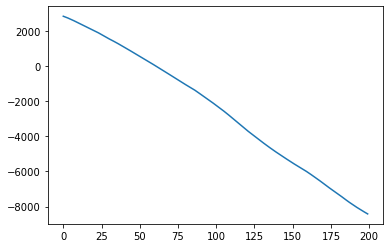

In [6]:
plt.plot(range(len(X)),x_t)

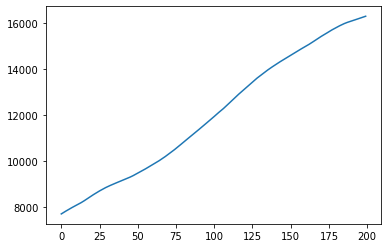

In [7]:
plt.plot(range(len(X)),y_t)

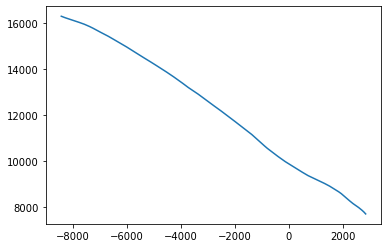

In [8]:
plt.plot(x_t,y_t)

In [9]:
# on a généré des trajectoires bruitées 
# maintenant on veut faire des observations 
# la fonction génère les mesures, elle prend X en entrée, et elle sort une trajectoire de mesure Y1...YN 

In [10]:
#inputs mesure 
mean_mes = [0,0]
c_1 = 100
c_2 = 300
R = np.diag([c_1**2,c_2**2])
H = np.array([[1,0,0,0],[0,0,1,0]])

In [11]:
def SimuObs(N,X,mean_mes,R,H):
    Y = N*[0]
    for k in range(N-1):
        Vk = np.random.multivariate_normal(mean_mes,R, size=None, check_valid='warn', tol=1e-8)
        Y[k+1] = np.dot(H,X[k]) + Vk
    return Y

In [12]:
Y = SimuObs(N,X,mean_mes,R,H)

In [13]:
x_mes = [y[0] for y in Y[1:]]
y_mes = [y[1] for y in Y[1:]]

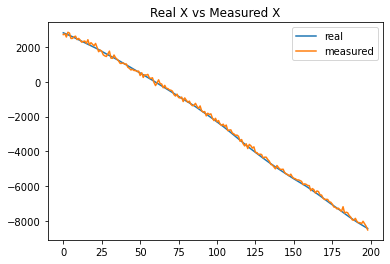

In [14]:
plt.plot(range(len(X)-1),x_t[1:],label='real')
plt.plot(range(len(X)-1),x_mes,label='measured')
plt.title('Real X vs Measured X')
plt.legend()
plt.show()

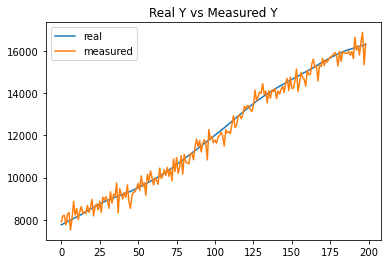

In [15]:
plt.plot(range(len(X)-1),y_t[1:],label='real')
plt.plot(range(len(X)-1),y_mes,label='measured')
plt.title('Real Y vs Measured Y')
plt.legend()
plt.show()

In [16]:
# on veut tracer le filtre de Kalman avec Intervalle de Confiance.

In [17]:
m_0

array([5000,  -20, 5000,   20])

In [18]:
Q = np.diag([c**2,c**2])

In [29]:
H

array([[1, 0, 0, 0],
       [0, 0, 1, 0]])

In [40]:
Y

[0,
 array([2705.1710375 , 7905.60675689]),
 array([2751.85606294, 8180.62521485]),
 array([2565.85457921, 8200.29552641]),
 array([2839.48440059, 7746.93669173]),
 array([2791.74368919, 8251.35745869]),
 array([2482.41373389, 8343.37667679]),
 array([2487.6971523 , 7516.43943859]),
 array([2581.79210241, 8043.91865495]),
 array([2612.20112979, 8874.78199123]),
 array([2416.83345313, 8228.20006014]),
 array([2484.53171936, 8529.28484634]),
 array([2383.01422419, 8007.08292331]),
 array([2269.71114619, 8378.63407874]),
 array([2311.86017798, 8624.3551116 ]),
 array([2332.69674763, 8311.48202282]),
 array([2202.22188245, 8373.0269398 ]),
 array([2411.04910224, 8293.59456671]),
 array([2110.27290243, 8680.70047869]),
 array([2240.93043874, 8347.28736587]),
 array([2149.39315027, 8590.40555314]),
 array([2058.79347677, 8964.40054446]),
 array([2196.74474277, 8178.55590048]),
 array([1955.72251672, 8654.40327247]),
 array([1721.5007768 , 8741.08570684]),
 array([1815.45469876, 8465.47595268

In [35]:
def Kalman(N,Y,F,G,m_0,P_0,H,R):
    #init
    X_k = N*[0]
    X_k[0] = m_0
    P_k = N*[0]
    P_k[0] = P_0
    
    X_kp1 = N*[0]
    P_kp1 = N*[0]
    #pred
    for k in range(N-1):
        X_k[k+1] = np.dot(F,X_kp1[k])
        P_k[k+1] = np.dot(np.dot(F,P_k[k]),F.T) + np.dot(np.dot(G,Q),G.T)
        K_kp1 = np.dot(np.dot(P_k[k+1],H.T),np.linalg.inv(np.dot(np.dot(H,P_k[k+1]),H.T)+R))
        print('X_k[k] :',X_k[k])
        print(Y[k])
        print(K_kp1)
        X_kp1[k+1] = X_k[k+1] + np.dot(K_kp1,Y[k+1]-np.dot(H,X_k[k+1]))
        P_kp1[k+1] = np.dot(np.eye(4)-np.dot(K_kp1,H),P_k[k+1])
    return X_kp1,P_kp1
    
    #la matrice de covariance permet de tracer l'IC 

In [36]:
X_filtered,P_f = Kalman(N,Y,F,G,m_0,P_0,H,R)

X_k[k] : [5000  -20 5000   20]
0
[[9.97506484e-01 0.00000000e+00]
 [1.00239353e-04 0.00000000e+00]
 [0.00000000e+00 9.77997267e-01]
 [0.00000000e+00 9.82788729e-05]]


ValueError: operands could not be broadcast together with shapes (2,) (2,4) 

In [ ]:
x_filtered = [x[0] for x in X_filtered[1:]]
y_filtered = [x[2] for x in X_filtered[1:]]

In [ ]:
plt.plot(range(len(x_filtered)),x_filtered,label='after kalman')
plt.plot(range(len(x_t)),x_t,label='state')
plt.legend()
plt.show()

In [ ]:
plt.plot(range(len(x_filtered)),x_filtered,label='after kalman')
plt.plot(range(len(x_mes)),x_mes,label='mes')
plt.legend()
plt.show()

In [ ]:
plt.plot(range(len(y_filtered)),y_filtered,label='after kalman')
plt.plot(range(len(y_t)),y_t,label='state')
plt.legend()
plt.show()

In [ ]:
# a faire :
# fix bug 
# coder le kalman etendu
# plot l'intervalle de confiance